# Does the Bitcoin dip belong to the past?

#### Disclaimer:
#### This is not an investment advice, it's just my personal opinion.

##### Although if you read carefully, you will see that I ask questions, provide code and explain which parameters I can adjust to make the charts look different.

In [1]:
# Required librarier
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Define the ticker symbol
tickerSymbol = 'BTC-USD'

# Download data
data = yf.download(tickerSymbol, start='2020-10-30', end="2023-03-31")

##### I can adjust the start date, end date, and previously selected range of quotes.
##### From my point of view, at this moment, it doesn't add anything.

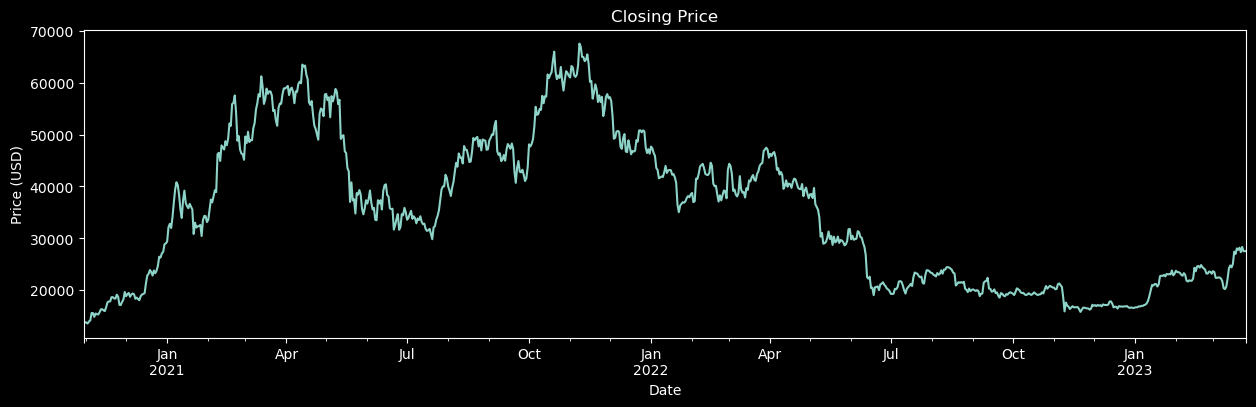

In [3]:
# Set plot style to dark background, if you use dark mode.
plt.style.use('dark_background')

# Plot closing price
data['Close'].plot(figsize=(15, 4))

# Set plot title and axis labels
plt.title('Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

##### On the other hand, detecting anomalies is a different matter. We know that anomaly detection in machine learning is the process of identifying and detecting unusual and potentially unwanted behaviors or observations in data. Anomalies are usually defined as data points that significantly differ from the rest of the data, and they can be the result of data errors, fraud, unknown phenomena, or other causes. 
##### Anomaly analysis uses various statistical techniques and machine learning algorithms, such as association rules, classification, regression, and neural networks, to detect and identify anomalies in data. This is an important tool in many fields, such as finance, medicine, security, and industry, where detecting anomalies can help prevent damage and improve operational efficiency.

##### The simplest anomaly detection model can be created by calculating  the z-score of the closing price for Bitcoin (BTC) by taking the difference between each closing price and the mean of all the closing prices and dividing that difference by the standard deviation of the closing prices. 
##### The resulting z-score represents how many standard deviations away from the mean each closing price is.

##### By calculating the z-score, you can identify anomalies in the Bitcoin price data. Data points with a z-score greater than a certain threshold  can be considered outliers or anomalies that may require further investigation or action.

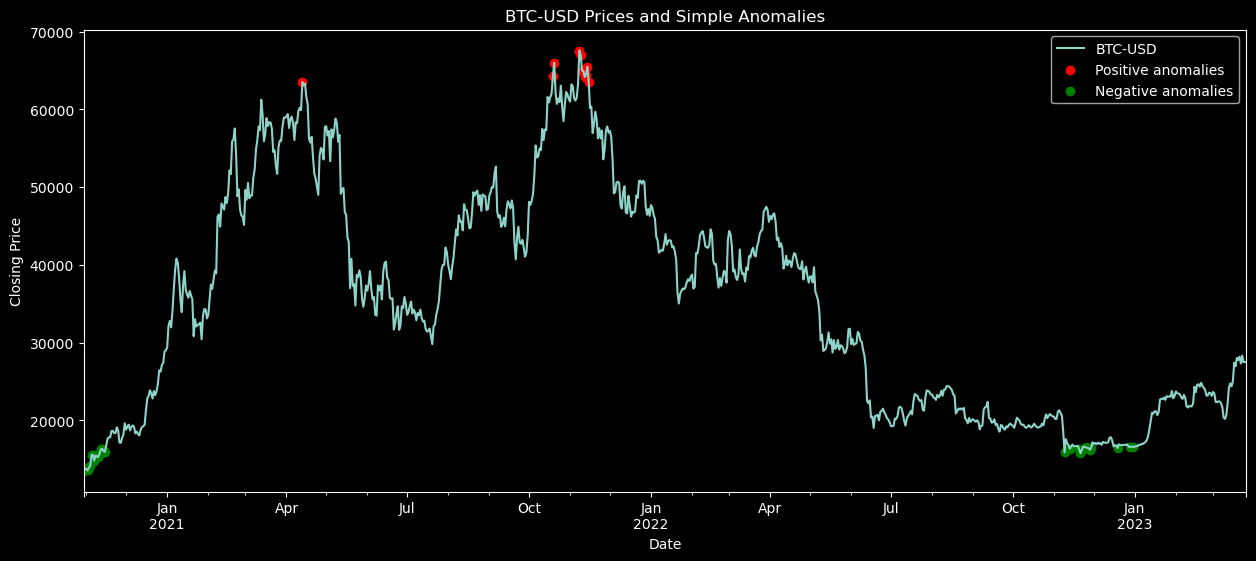

In [4]:
# Calculating the z-score values for the Bitcoin closing price
data['zscore'] = (data['Close'] - data['Close'].mean()) / data['Close'].std()

# Determining the threshold z-score value above which we have anomalies
threshold = 2.0

# Displaying rows in which the z-score value exceeds the threshold
anomalies = data[ data['zscore'] > threshold]

# Converting the anomalies series to a DataFrame
anomalies_df = anomalies['Close'].to_frame()

# Determining the threshold z-score value below which we have anomalies
threshold_minus = -1.3
# Displaying rows in which the z-score value exceeds the negative threshold.
anomalies_minus = data[ data['zscore'] < threshold_minus]
anomalies_minus_df = anomalies_minus['Close'].to_frame()

# Set the dark style
plt.style.use('dark_background')

# Plotting the quotation chart with marked anomaly points
fig, ax = plt.subplots(figsize=(15, 6))
data['Close'].plot(ax=ax, label=tickerSymbol)
plt.scatter(x=anomalies_df.index, y=anomalies_df['Close'], color='red', label='Positive anomalies')
plt.scatter(x=anomalies_minus_df.index, y=anomalies_minus_df['Close'], color='green', label='Negative anomalies')
plt.title(f'{tickerSymbol} Prices and Simple Anomalies')
plt.xlabel('Date')
plt.ylabel('Closing Price')
ax.legend()
plt.show()

##### The red and green dots indicate when the market changed its direction. Please note that if you start changing the thresholds, these understood anomalies may start disappearing or appearing."

##### Now let's make our model a bit more complicated. That is, let's use a machine learning model called IsolationForest. It is a model based on finding isolated points that have different characteristics from most of the points in the dataset. Here we are looking for places on the chart that differ as much as possible from the others. After all, we want to answer the question whether we have already passed the dip in bitcoin.

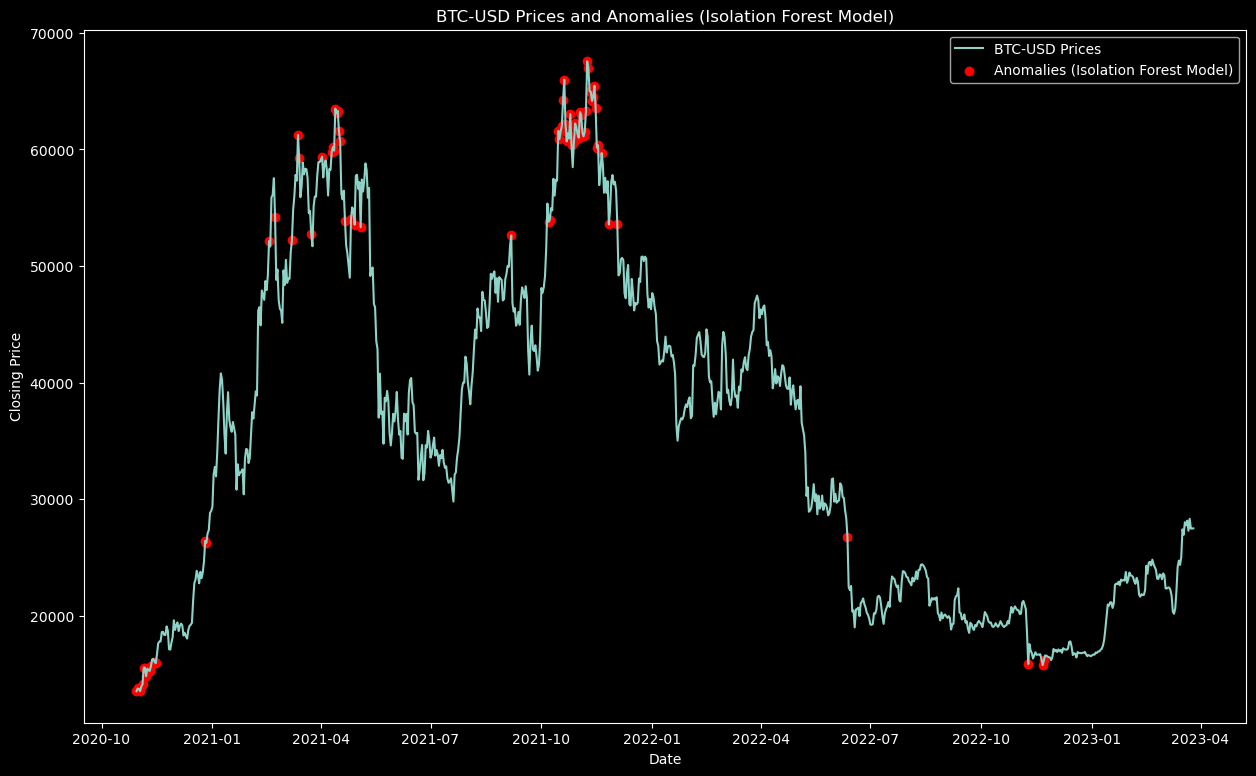

In [5]:
# Define the isolation forest model
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.09), random_state=42)

# Fit the model to the data
model.fit(data[['Close']].values)

# Predict the anomalies
anomalies = model.predict(data[['Close']].values)

# Plot the data and anomalies
plt.figure(figsize=(15, 9))
plt.plot(data.index, data['Close'], label=tickerSymbol+' Prices')
plt.scatter(data.index[anomalies==-1], data['Close'][anomalies==-1], color='red', label='Anomalies (Isolation Forest Model)')
plt.title(f'{tickerSymbol} Prices and Anomalies (Isolation Forest Model)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

plt.show()

#### This code defines an Isolation Forest model. The Isolation Forest algorithm is an unsupervised machine learning algorithm used for anomaly detection. It works by isolating observations in a dataset by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of that feature. This process is repeated recursively until each observation is isolated or grouped into an anomaly cluster.

##### Here are the parameters used in this model definition:

##### * n_estimators: This specifies the number of trees in the forest. A higher number of trees can improve the accuracy of the model, but it can also increase the training time and memory usage.
##### * max_samples: This specifies the maximum number of samples to be drawn from the dataset to train each tree in the forest. If set to 'auto', the maximum number of samples is equal to the number of observations in the dataset.
#### * contamination: This specifies the expected proportion of anomalies in the dataset. In this case, it is set to 0.09, meaning that the model is expected to detect 9% of the observations as anomalies.
##### * random_state: This is a random seed used to ensure reproducibility of the results.
##### Once the model is defined, it can be trained on a dataset and used to detect anomalies in new data points.

#### This model is an important tool in many fields, such as finance, medicine, security, and industry, where detecting anomalies can help prevent damage and improve operational efficiency.